In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import os
import warnings

In [2]:
df_a = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df_a.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df_a.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
df = df_a[df_a['number_of_reviews'] >= 10]

In [6]:
df.isnull().count()

id                                19375
name                              19375
host_id                           19375
host_name                         19375
neighbourhood_group               19375
neighbourhood                     19375
latitude                          19375
longitude                         19375
room_type                         19375
price                             19375
minimum_nights                    19375
number_of_reviews                 19375
last_review                       19375
reviews_per_month                 19375
calculated_host_listings_count    19375
availability_365                  19375
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.size

309824

In [9]:
df_ab = df
df['name'] = df['name'].str.lower()
df_pca = pd.DataFrame()
df_pca['new_name'] = df['name'].str.split()

df_pca

,new_name
1,"[skylit, midtown, castle]"
3,"[cozy, entire, floor, of, brownstone]"
5,"[large, cozy, 1, br, apartment, in, midtown, e..."
6,[blissartsspace!]
7,"[large, furnished, room, near, b'way]"
...,...
46509,"[luxury, 3, bedroom, home, close, to, laguardi..."
46888,"[beautiful, place, in❤️of, manhattan, ⌚times, ..."
46891,"[★★★chic, place, in, center, of, manhattan★★★]"
46937,"[★, amazing★, time, square/, 2, bedroom, 3, be..."


In [10]:
df['neighborhood'] = df['neighbourhood_group'] + ', ' + df['neighbourhood']

df.drop(columns = ['neighbourhood_group', 'neighbourhood'], inplace=True)

In [11]:
df_ex_1 = df

In [12]:
df_ex_1.drop(columns = ['name'], inplace = True)

In [13]:
df_ex_1.drop(columns = ['host_id', 'id', 'host_name', 'longitude', 'latitude', 'last_review'], inplace = True)

In [14]:
df_ex_1

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighborhood
1,Entire home/apt,225,1,45,0.38,2,355,"Manhattan, Midtown"
3,Entire home/apt,89,1,270,4.64,1,194,"Brooklyn, Clinton Hill"
5,Entire home/apt,200,3,74,0.59,1,129,"Manhattan, Murray Hill"
6,Private room,60,45,49,0.40,1,0,"Brooklyn, Bedford-Stuyvesant"
7,Private room,79,2,430,3.47,1,220,"Manhattan, Hell's Kitchen"
...,...,...,...,...,...,...,...,...
46509,Entire home/apt,235,2,10,8.33,1,321,"Queens, East Elmhurst"
46888,Entire home/apt,350,1,10,10.00,1,163,"Manhattan, Hell's Kitchen"
46891,Entire home/apt,320,1,12,12.00,1,189,"Manhattan, Hell's Kitchen"
46937,Entire home/apt,500,3,14,14.00,2,45,"Manhattan, Hell's Kitchen"


In [15]:
df_ex_1['room_type'].value_counts()

room_type
Entire home/apt    10020
Private room        8947
Shared room          397
Name: count, dtype: int64

In [16]:
df_ex_1 = pd.get_dummies(df_ex_1, columns = ['room_type', 'neighborhood'], dtype = int)

In [18]:
df_ex_1

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,"neighborhood_Bronx, Allerton",...,"neighborhood_Staten Island, Rossville","neighborhood_Staten Island, Shore Acres","neighborhood_Staten Island, Silver Lake","neighborhood_Staten Island, South Beach","neighborhood_Staten Island, St. George","neighborhood_Staten Island, Stapleton","neighborhood_Staten Island, Tompkinsville","neighborhood_Staten Island, Tottenville","neighborhood_Staten Island, West Brighton","neighborhood_Staten Island, Westerleigh"
1,225,1,45,0.38,2,355,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89,1,270,4.64,1,194,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,200,3,74,0.59,1,129,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,60,45,49,0.40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,79,2,430,3.47,1,220,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46509,235,2,10,8.33,1,321,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46888,350,1,10,10.00,1,163,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46891,320,1,12,12.00,1,189,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46937,500,3,14,14.00,2,45,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Experiment 1

In [19]:
X = df_ex_1.drop('price', axis =1)
Y = df_ex_1['price']

In [20]:
# Create a boolean array indicating which columns contain either "Email" or "Phone"
#Resource 2 was used for this

x_vis = X
cols_to_drop = x_vis.columns[x_vis.columns.str.contains('neighborhood')]
x_vis.drop(cols_to_drop, axis=1, inplace=True)
x_vis

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,1,45,0.38,2,355,1,0,0
3,1,270,4.64,1,194,1,0,0
5,3,74,0.59,1,129,1,0,0
6,45,49,0.40,1,0,0,1,0
7,2,430,3.47,1,220,0,1,0
...,...,...,...,...,...,...,...,...
46509,2,10,8.33,1,321,1,0,0
46888,1,10,10.00,1,163,1,0,0
46891,1,12,12.00,1,189,1,0,0
46937,3,14,14.00,2,45,1,0,0


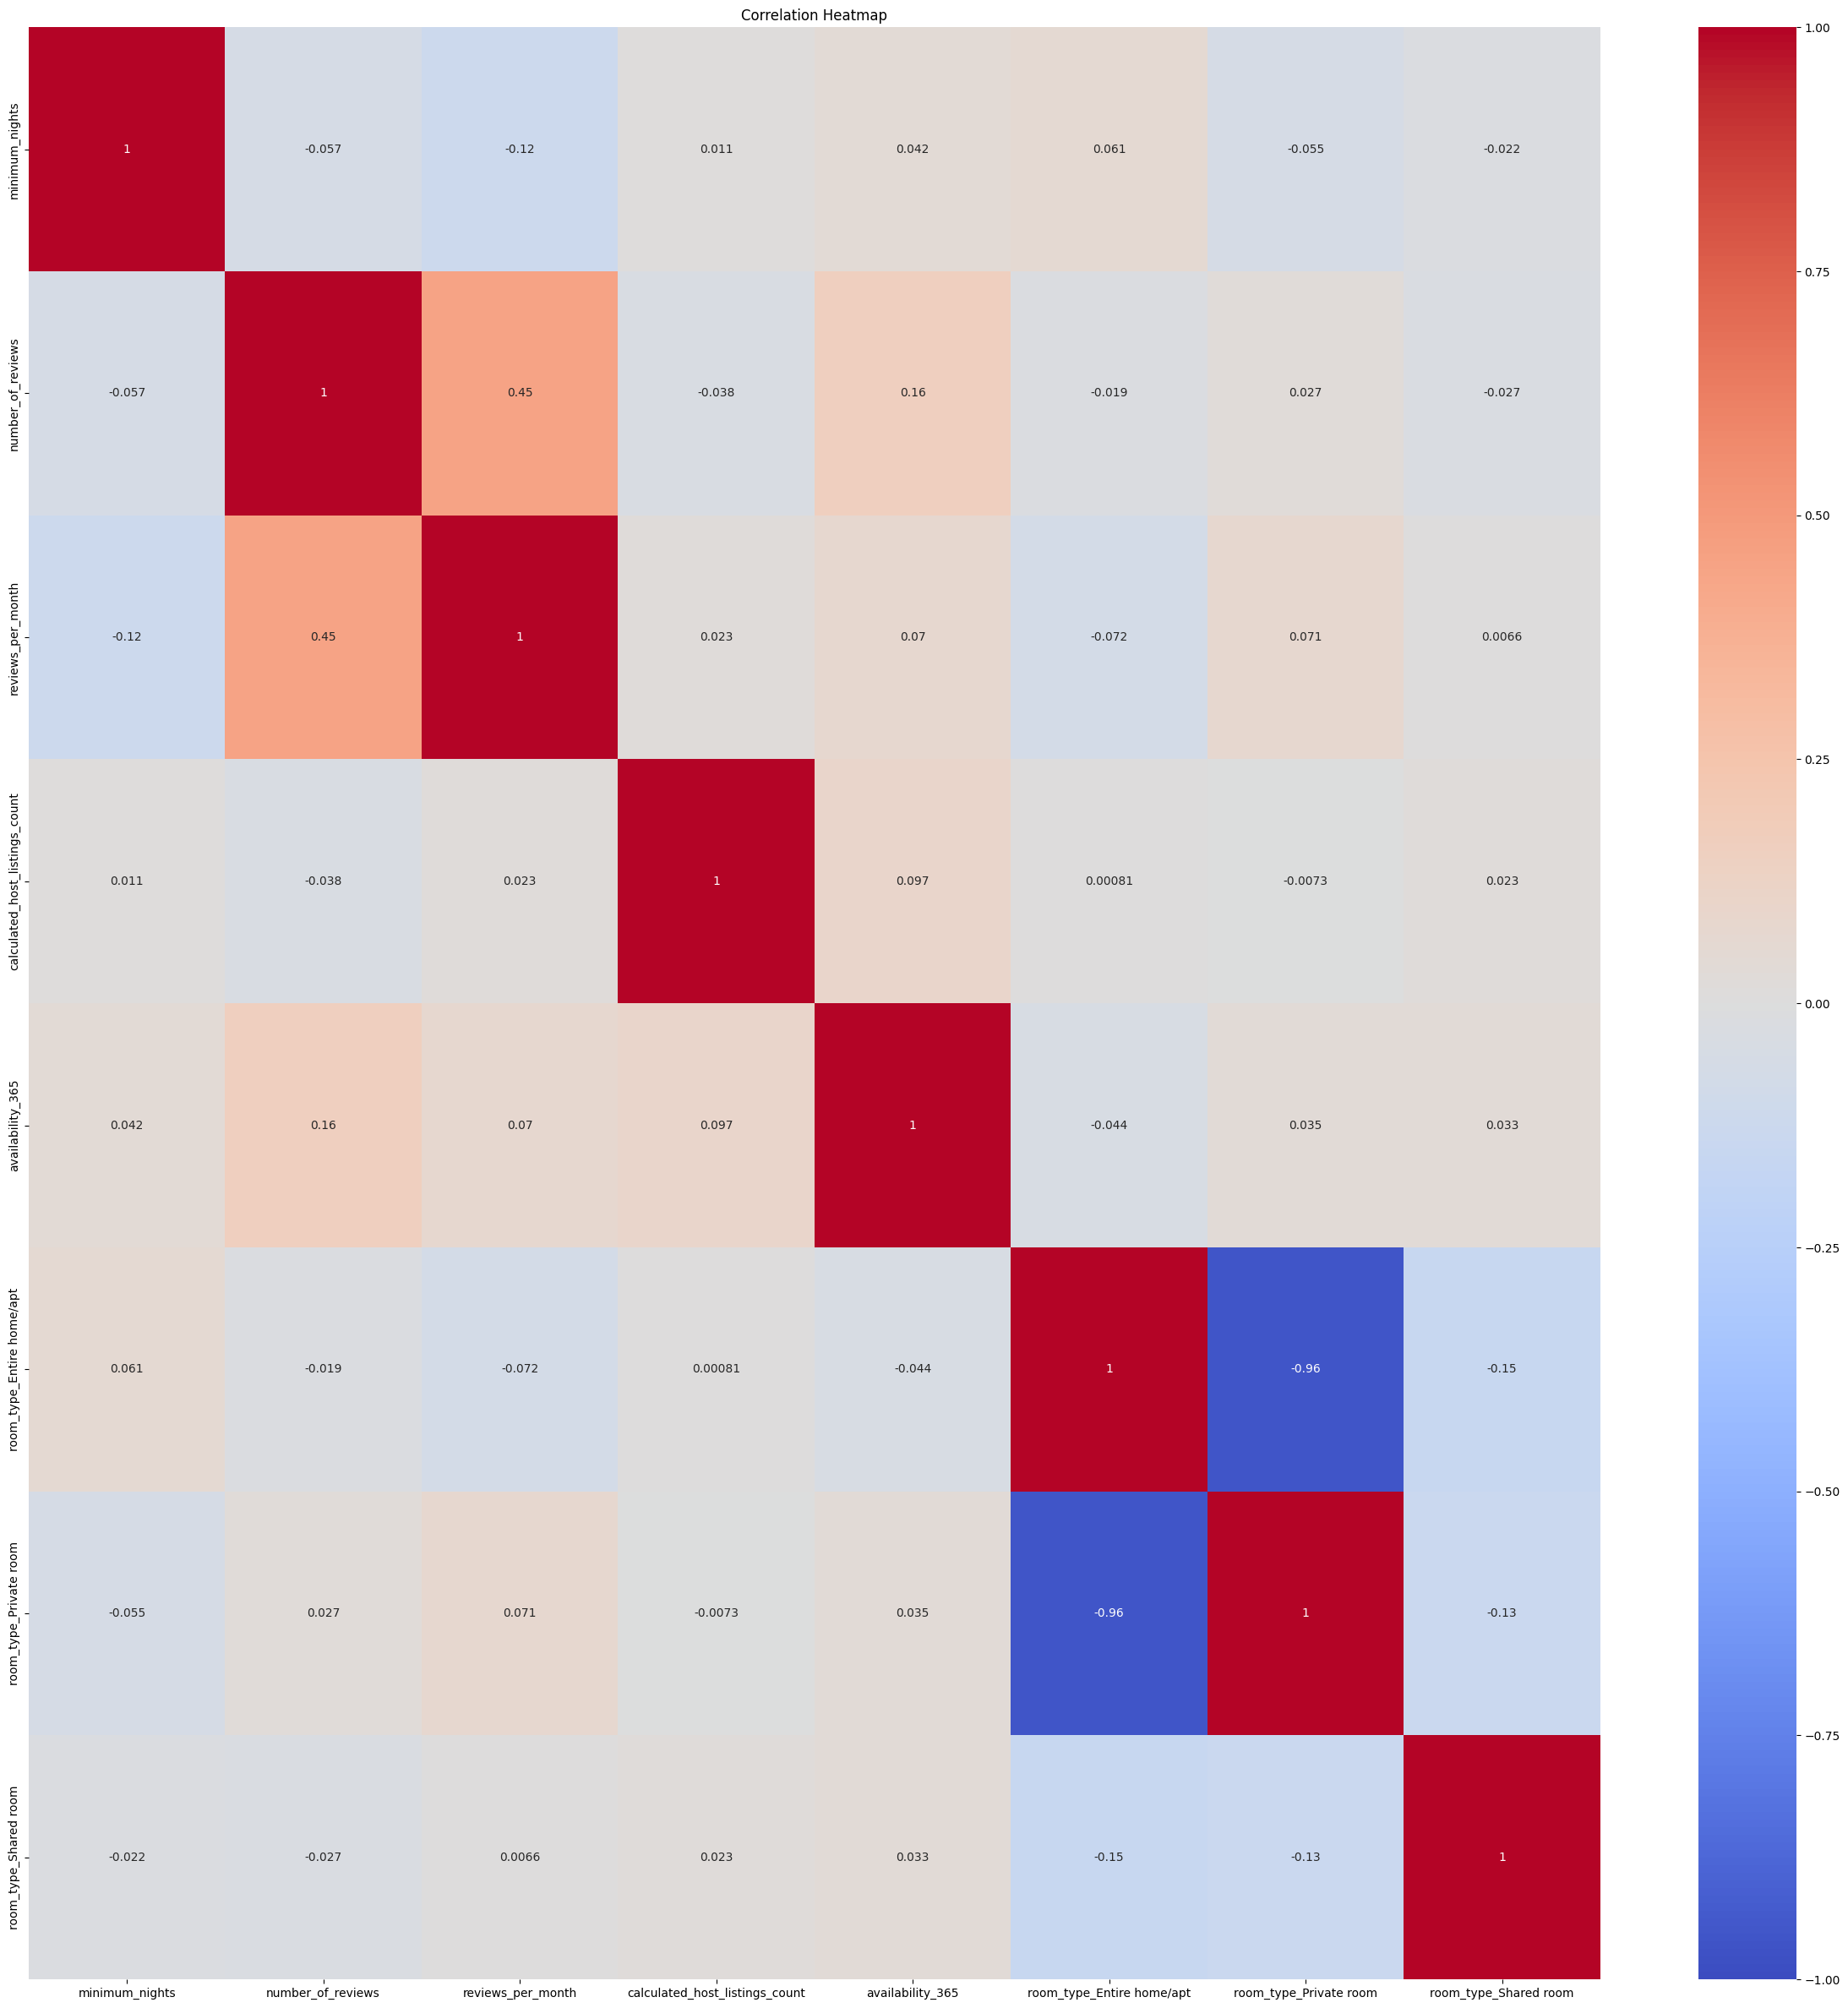

In [21]:
corr_matrix = x_vis.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Training experiment 1 model

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =42)

In [24]:
mlr_model = sm.OLS(Y_train, X_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     488.2
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:47:43   Log-Likelihood:                -95972.
No. Observations:               15491   AIC:                         1.920e+05
Df Residuals:                   15483   BIC:                         1.920e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
minimum_nigh

In [31]:
#neighborhood_list = df_ex_1['neighbourhood_group'].unique().tolist()

In [14]:
#neighborhood_list

NameError: name 'neighborhood_list' is not defined

In [15]:
def neighborhood(string):
    if string == "Manhattan":
        return 1
    if string == "Brooklyn":
        return 2
    if string == "Queens":
        return 3
    if string == "Staten Islan":
        return 4
    if string == "Bronx":
        return 5
    else:
        return 0

#df['neighborhood_number'] = df['neighbourhood_group'].str.neighborhood()

NameError: name 'df' is not defined

In [16]:
#for col in df_ex_1:
#    if df_ex_1[col].dtype == object:
#        df_ex_1 = pd.get_dummies(df_ex_1, columns = [col])

NameError: name 'df_ex_1' is not defined

In [18]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

[Resource 2](https://saturncloud.io/blog/how-to-drop-columns-containing-a-specific-string-from-pandas-dataframe/#step-4-drop-multiple-columns-containing-a-specific-string)